In [1]:
import numpy as np
from scipy.optimize import approx_fprime

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

In [14]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

**бесконечное количество локальных экстремумов**
$f(x)=sin(x)$

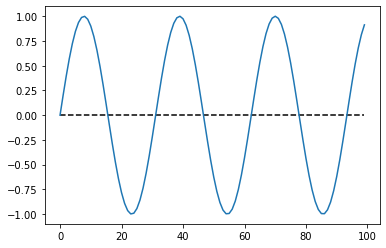

In [59]:
x = np.array([np.sin(x) for x in np.linspace(0, 20, 100)])
plt.plot(np.zeros_like(x), "--", color="black")
plt.plot(x)
plt.show()

**2 локальных экстремума** $f(x)=x^3-9x$

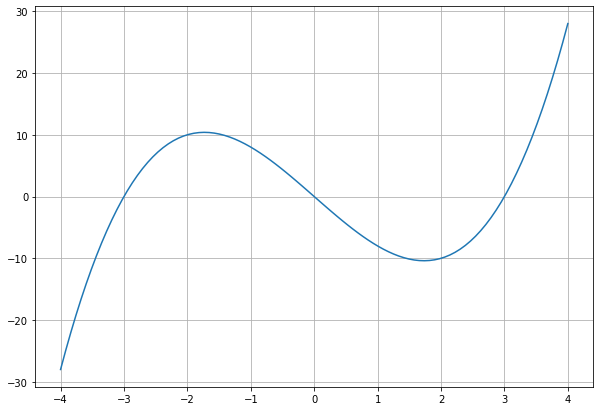

In [225]:
x = np.linspace(-4, 4, 100)
y = x**3 - 9*x
plt.plot(x, y)
plt.grid()
plt.show()

Найду критические точки, а для этого производную функции приравниваем к нулю:

$f'(x) = 3x^2 -9$

$3x^2 -9$ = 0$

$D = 0 - 4*3*(-9) = 108$

$x1 = -10,4/6 = 1,73$

$x1 = 10,4/6 = -1,73$

Для примера возьму три точки на оси абсцисс:

$f'(-3) = 3*9 - 9 =18$ следовательно функция растет

$f'(0) = 3*0 - 9 =-9$ функция убывает, и -1,73 - это точка максимума

$f'(2) = 3*4 - 9 =3$ функция растет, и 1,73 - это точка минимума

**3 локальных экстремума** $f(x)=x^2(x-2)^2$

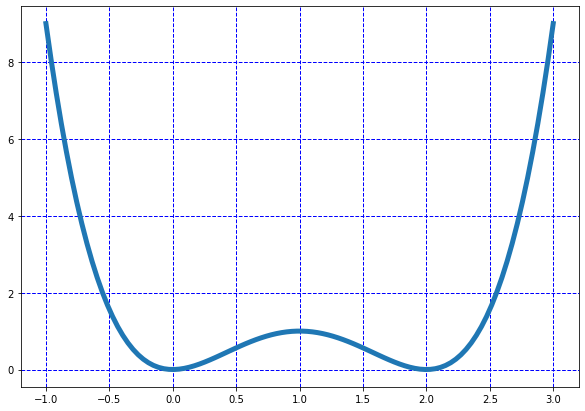

In [175]:
x = np.linspace(-1, 3, 100)
y = x**2 * (x - 2)**2
fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 5)

ax.grid(color = 'blue', linewidth = 1, linestyle = '--')    
plt.show()

На примере этого графика хочу проверить, что в точке экстремума (x=1) производная функции равна 0.

$f(x) = x^2*(x-2)^2 = x^2*(x^2-4x+4) = x^4-4x^3+4x^2$ 

$f'(x) = 4x^3-12x^2+8x$

$f'(1) = 4-12+8 = 0$


In [184]:
from scipy.misc import derivative
def f(x):
    return x**2 * (x - 2)**2
derivative(f, 1.0)

0.0

**область определения 1 точка** $f(x)=sqrt(-x)$

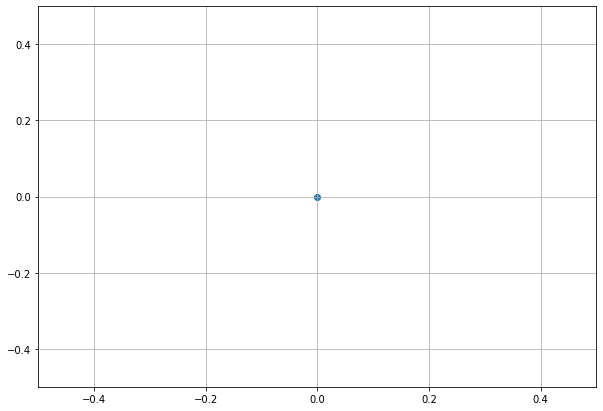

In [211]:
# честно пыталась построить с диапазоном иксов, отказывается строить
x = 0
y = np.sqrt(-x)

ax = plt.axes()

plt.xlim([-0.5,0.5])
plt.ylim([-0.5, 0.5])

plt.scatter(x, y)
plt.grid()
plt.show()

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

$f'(x) = (sin^2(2x+1)'*(sin(2x+1))'*(2x+1)' = 2sin(2x+1)*cos(2x+1)*2 = 4*sin(2x+1)*cos(2x+1) = 4sin(4x+2)$

$f''(x) = (4sin(4x+2))' = 4cos(4x+2)*4 = 16cos(4x+2)$

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$fx'(x,y) = 4xy^3 - 1/x^2 + y^2 = 4*8 - 1 + 4 = 35$

$fy'(x,y) = 2x^2*3y^2 + 2yx = 6x^2y^2 + 2yx = 6*4 + 2*2 = 28$

In [2]:
def func(x, c0, c1, c2):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 * x[1]**3 + c1/x[0] + x[1]**2 * x[0] + c2

In [210]:
x = [1, 2]
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], 2, 1, 7)

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [220]:
from scipy.optimize import minimize, approx_fprime, fmin, brute

In [235]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [266]:
x = np.array([100, 200])
lr = 0.1

In [267]:
for i in range(20):
    # Calculate gradient
    # grad f(x0)= f'x(x0)*i + f'y(x0)*j
    grad = 2*x[0] + 2*x[1]
    print(grad)

    
    # Update x with gradient
    x[0] = x[0] - lr*grad
    x[1] = x[1] - lr*grad
    print(x)

600
[ 40 140]
360
[  4 104]
216
[-17  82]
130
[-30  69]
78
[-37  61]
48
[-41  56]
30
[-44  53]
18
[-45  51]
12
[-46  49]
6
[-46  48]
4
[-46  47]
2
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]
0
[-46  46]


In [268]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-46  46]
Значение функции в минимуме:  4232


Проверка с помощью встроенной функции scipy: 

In [269]:
grad = minimize(f, x, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 67
         Function evaluations: 130
